In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns

Mounting google drive and making sure that our class implementation is added to the python intrepreter path

In [30]:
from google.colab import drive
drive.mount('/content/drive')

import sys

# Add the current directory to Python's search path
sys.path.append("/content/drive/MyDrive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fake reviews dataset.csv")
# df = df.sample(frac=0.2, random_state=1234)

In [32]:
df.tail()

,category,rating,label,text_
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...


In [33]:
print(df['category'].unique())

['Home_and_Kitchen_5' 'Sports_and_Outdoors_5' 'Electronics_5'
 'Movies_and_TV_5' 'Tools_and_Home_Improvement_5' 'Pet_Supplies_5'
 'Kindle_Store_5' 'Books_5' 'Toys_and_Games_5'
 'Clothing_Shoes_and_Jewelry_5']


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [35]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [36]:
df.dropna(inplace=True)

In [37]:
count = df['rating'].value_counts()

In [38]:
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
print(labels)
print(values)

Index([5.0, 4.0, 3.0, 1.0, 2.0], dtype='float64', name='rating')
[24559  7965  3786  2155  1967]


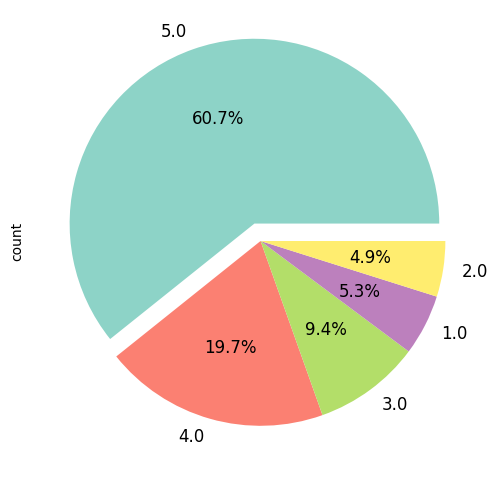

In [39]:
plt.figure(figsize=(6,6))
# plt.pie(values ,labels=labels, explode=(0.1,0,0,0,0), shadow=True,autopct='%1.1f%%')
count.plot.pie(autopct ='%1.1f%%' , startangle= 0 , explode=(0.1,0,0,0,0), cmap= 'Set3', fontsize =12)
plt.show()

In [40]:
df['label'].value_counts()

,count
label,
CG,20216
OR,20216


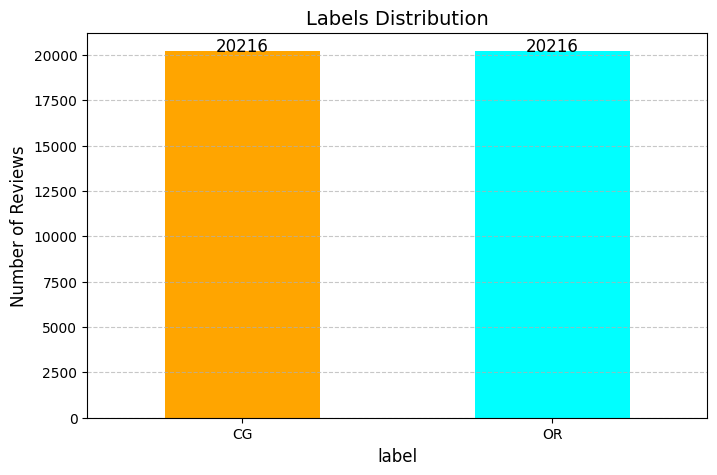

In [41]:
import matplotlib.pyplot as plt

count_label= df['label'].value_counts()
# count_label = pd.Series(count_label)

# Plot bar chart
plt.figure(figsize=(8, 5))

# Add title and labels
plt.title("Labels Distribution", fontsize=14)
plt.xlabel("Fake(CG) vs Real(OR)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# for colored bargraph
ax = count_label.plot(kind='bar', color=['orange', 'cyan'])

# Add numeric values on bars
for i, v in enumerate(count_label):
    ax.text(i, v + 3, str(v), ha='center', fontsize=12)

# Show the bar chart
plt.xticks(rotation=0)  # Keep category labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()

In [42]:
# Converting into LOWER_CASE
df['Lowercased_text'] = df['text_'].str.lower()
df.rename(columns={'text_': 'Original Text'}, inplace=True)
df.tail()

,category,rating,label,Original Text,Lowercased_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,i wasn't sure exactly what it would be. it is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...","you can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,i liked nothing about this dress. the only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...


In [43]:
def remove_punctuation(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))
  # The first two arguments ('' and '') are empty strings, meaning there's nothing to replace and nothing to replace with.

In [44]:
# df.drop(df.columns[3], axis=1, inplace=True)
df['Punctuation_Removed'] = df['Lowercased_text'].apply(lambda X: remove_punctuation(X))

In [45]:
df.tail()

,category,rating,label,Original Text,Lowercased_text,Punctuation_Removed
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,i wasn't sure exactly what it would be. it is ...,i wasnt sure exactly what it would be it is a ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...","you can wear the hood by itself, wear it with ...",you can wear the hood by itself wear it with t...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,i liked nothing about this dress. the only rea...,i liked nothing about this dress the only reas...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...


In [ ]:
import nltk
nltk.download('popular')

In [47]:
# Removing Stopwords

from nltk.corpus import stopwords
", ".join(stopwords.words("english"))


"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [48]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [49]:
df.drop(df.columns[4], axis=1, inplace=True)
df['Stopwords_Removed'] = df['Punctuation_Removed'].apply(lambda X: remove_stopwords(X))
df.tail()

,category,rating,label,Original Text,Punctuation_Removed,Stopwords_Removed
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,i wasnt sure exactly what it would be it is a ...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",you can wear the hood by itself wear it with t...,wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,i liked nothing about this dress the only reas...,liked nothing dress reason gave 4 stars ordere...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...,work wedding industry work long days feet outs...


In [50]:
from collections import Counter
word_count = Counter()

for text in df['Stopwords_Removed']:
  for word in text.split():
    word_count[word] += 1

word_count.most_common(10)

[('great', 16419),
 ('book', 15001),
 ('good', 14195),
 ('one', 13395),
 ('love', 10805),
 ('would', 10362),
 ('well', 10278),
 ('story', 9626),
 ('like', 9425),
 ('read', 8868)]

In [51]:
RARE_WORDS = set(word for (word,wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'32degrees',
 'ducks',
 'dwrthis',
 'gallbladder',
 'hippora',
 'hyvent',
 'jacketit',
 'propertys',
 'timemans'}

In [52]:
# Remove Special Character

import re
def remove_special_char(text):
  text = re.sub('[^a-zA-Z0-9]', ' ', text)
  text = re.sub('\s+',' ',text)
  return text

In [53]:
df.drop(df.columns[4], axis=1, inplace=True)
df['Special_Character_Removed'] = df['Stopwords_Removed'].apply(lambda X:remove_special_char(X))
df.tail()

,category,rating,label,Original Text,Stopwords_Removed,Special_Character_Removed
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,read reviews saying bra ran small ordered two ...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,liked nothing dress reason gave 4 stars ordere...,liked nothing dress reason gave 4 stars ordere...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,work wedding industry work long days feet outs...,work wedding industry work long days feet outs...


In [54]:
# Stemming

# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# def stem_words(text):
#   return " ".join([ps.stem(word) for word in text.split()])

In [55]:
# df.drop(df.columns[3], axis=1, inplace=True)
# df['Stemmed_text'] = df['Special_Character_Removed'].apply(lambda X: stem_words(X))
# df.tail()

In [56]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
wordnet_map = {'N':wordnet.NOUN, 'V':wordnet.VERB, 'J':wordnet.ADJ, 'R':wordnet.ADV}

def lemmatize_words(text):
  pos_text = pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
df.drop(df.columns[4], axis=1, inplace=True)
nltk.download('averaged_perceptron_tagger_eng')
df['lemmatized_text'] = df['Special_Character_Removed'].apply(lambda X: lemmatize_words(X))
df.tail()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,category,rating,label,Original Text,Special_Character_Removed,lemmatized_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,read review say bra run small order two band c...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...,liked nothing dress reason gave 4 stars ordere...,like nothing dress reason give 4 star order si...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...,work wedding industry work long days feet outs...,work wed industry work long day foot outside h...


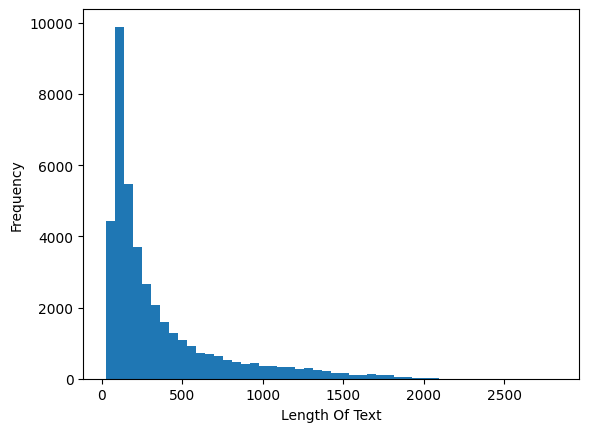

In [ ]:
plt.hist(df['Original Text'].apply(len),bins=50)
# Add labels to the axes
plt.xlabel('Length Of Text')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()

In [ ]:
df.groupby('label').describe()

rating                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0

In [ ]:
df.drop(df.columns[4], axis=1, inplace=True)
df['label'] = df['label'].apply(lambda x: 1 if x == 'OR' else 0)
df.tail()

,category,rating,label,Original Text,lemmatized_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,read review say bra run small order two band c...
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,like nothing dress reason give 4 star order si...
40431,Clothing_Shoes_and_Jewelry_5,5.0,1,I work in the wedding industry and have to wor...,work wed industry work long day foot outside h...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

# Splitting the dataset
X = df[['rating', 'lemmatized_text']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply TF-IDF on training data only
v = TfidfVectorizer()
X_train_tfidf = v.fit_transform(X_train['lemmatized_text'])  # Fit & transform on train data
X_test_tfidf = v.transform(X_test['lemmatized_text'])  # Only transform on test data

# Convert rating to 2D array (needed for stacking)
X_train_rating = np.array(X_train['rating']).reshape(-1, 1)
X_test_rating = np.array(X_test['rating']).reshape(-1, 1)

# Combine numerical rating with TF-IDF features
# X_train = hstack([X_train['rating'].values.reshape(-1, 1), X_train_tfidf])
# X_test = hstack([X_test['rating'].values.reshape(-1, 1), X_test_tfidf])

X_train = hstack([X_train_rating, X_train_tfidf])
X_test = hstack([X_test_rating, X_test_tfidf])

# Output the transformed data
X_train.shape, X_test.shape
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (32345, 39687)
X_test shape: (8087, 39687)
y_train shape: (32345,)
y_test shape: (8087,)


In [ ]:
print(f"X_train type: {type(X_train)}")
print(f"X_test type: {type(X_test)}")
print(f"y_train type: {type(y_train)}")
print(f"y_test type: {type(y_test)}")

X_train type: <class 'scipy.sparse._coo.coo_matrix'>
X_test type: <class 'scipy.sparse._coo.coo_matrix'>
y_train type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>


**Save X_train, X_test, y_train, and y_test as arrays before training the model**

So we dont have to run the above code if we just want to adjust hyperparameters later

In [ ]:
# comment this cell and uncomment the below cell for doing on laptop
from scipy.sparse import save_npz
import pandas as pd

# Save sparse matrices
save_npz("/content/drive/MyDrive/Train_Test/X_train.npz", X_train)
save_npz("/content/drive/MyDrive/Train_Test/X_test.npz", X_test)

# Save Pandas Series
y_train.to_csv("/content/drive/MyDrive/Train_Test/y_train.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/Train_Test/y_test.csv", index=False)


In [ ]:
# # uncomment this cell for doing on laptop
# from scipy.sparse import save_npz
# import pandas as pd

# # Save sparse matrices
# save_npz("Train_Test/X_train.npz", X_train)
# save_npz("Train_Test/X_test.npz", X_test)

# # Save Pandas Series
# y_train.to_csv("Train_Test/y_train.csv", index=False)
# y_test.to_csv("Train_Test/y_test.csv", index=False)

Loading the saved arrays

In [59]:
# comment this cell and uncomment the below cell for doing on laptop
from scipy.sparse import load_npz

# Load sparse matrices
X_train = load_npz("/content/drive/MyDrive/Train_Test/X_train.npz")
X_test = load_npz("/content/drive/MyDrive/Train_Test/X_test.npz")

# Load Pandas Series
y_train = pd.read_csv("/content/drive/MyDrive/Train_Test/y_train.csv").squeeze()
y_test = pd.read_csv("/content/drive/MyDrive/Train_Test/y_test.csv").squeeze()


In [ ]:
# # uncomment this cell for doing on laptop

# # Load sparse matrices
# X_train = load_npz("Train_Test/X_train.npz")
# X_test = load_npz("Train_Test/X_test.npz")

# # Load Pandas Series
# y_train = pd.read_csv("Train_Test/y_train.csv").squeeze()
# y_test = pd.read_csv("Train_Test/y_test.csv").squeeze()

In [ ]:
print(f"X_train type: {type(X_train)}")
print(f"X_test type: {type(X_test)}")
print(f"y_train type: {type(y_train)}")
print(f"y_test type: {type(y_test)}")

X_train type: <class 'scipy.sparse._coo.coo_matrix'>
X_test type: <class 'scipy.sparse._coo.coo_matrix'>
y_train type: <class 'pandas.core.series.Series'>
y_test type: <class 'pandas.core.series.Series'>


In [ ]:
X_train.shape, X_test.shape

((32345, 39687), (8087, 39687))

**Using our algorithm**

For Random Forest

Accuracy for Random Forest: 0.730431556819587
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.87      0.77      4105
           1       0.82      0.58      0.68      3982

    accuracy                           0.73      8087
   macro avg       0.75      0.73      0.72      8087
weighted avg       0.75      0.73      0.72      8087



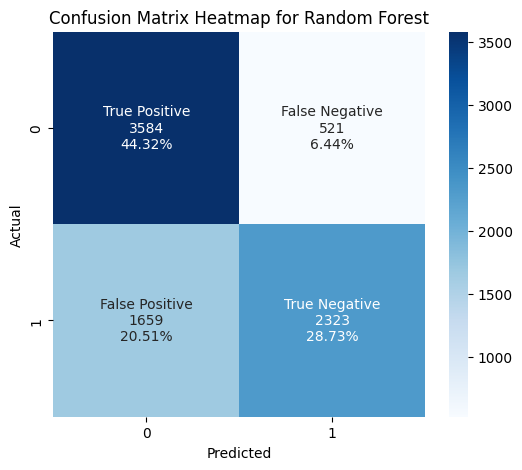

In [ ]:
from RandomForest import RandomForest
# Instantiate the estimator
rf_model = RandomForest()

# Fit the training data to model
rf_model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = rf_model.predict(X_test.toarray())

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report #, ConfusionMatrixDisplay

# saving accuracy
rf_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy for Random Forest: {rf_accuracy}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, predictions))

# Compute and display confusion matrix
# ConfusionMatrixDisplay.from_predictions(y_test, predictions)

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                     f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                     f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Random Forest')
plt.show()

For Logistic Regression

Accuracy for Logistic Regression: 0.7211574131321875
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.54      0.66      4105
           1       0.66      0.90      0.76      3982

    accuracy                           0.72      8087
   macro avg       0.76      0.72      0.71      8087
weighted avg       0.76      0.72      0.71      8087



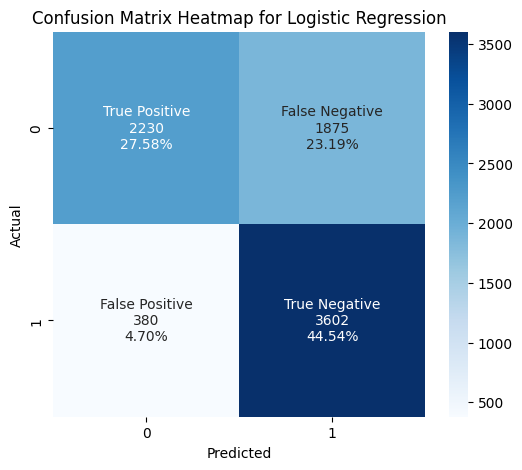

In [ ]:
from Logistic_Regression import LogisticRegression

# Instantiate the Logistic Regression
lr_model = LogisticRegression()

# Note: Ensure that 'y_train' is in a compatible shape (1D array)
lr_model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = lr_model.predict(X_test.toarray())

# Evaluate the Logistic Regression Model
from sklearn.metrics import accuracy_score, classification_report #, ConfusionMatrixDisplay

lr_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy for Logistic Regression: {lr_accuracy}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, predictions))

# Compute and display confusion matrix
# ConfusionMatrixDisplay.from_predictions(y_test, predictions)

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                     f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                     f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Logistic Regression')
plt.show()

For Svm

Accuracy for SVM: 0.8239149251885742
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      4105
           1       0.79      0.88      0.83      3982

    accuracy                           0.82      8087
   macro avg       0.83      0.82      0.82      8087
weighted avg       0.83      0.82      0.82      8087



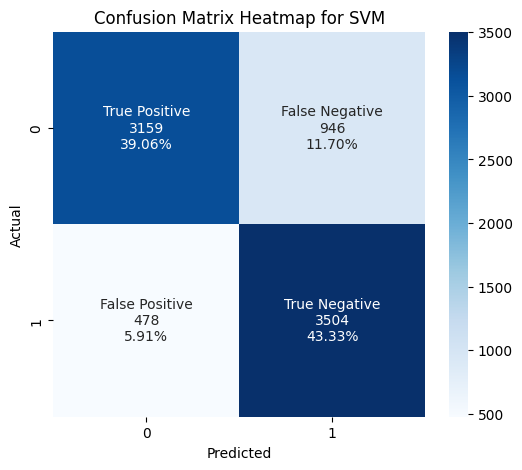

In [ ]:
from SVM_C import SVM_Classifier
# Instantiate the SVM svm_model
svm_model = SVM_Classifier(no_of_iterations = 1000)

# Fit the svm_model to the training data
# Note: Ensure that 'y_train' is in a compatible shape (1D array)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_model.predict(X_test)

# Evaluate the svm_model
from sklearn.metrics import accuracy_score, classification_report #, ConfusionMatrixDisplay

svm_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy for SVM: {svm_accuracy}")
print("Classification Report for SVM:")
print(classification_report(y_test, predictions))

# Compute and display confusion matrix
# ConfusionMatrixDisplay.from_predictions(y_test, predictions)

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                     f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                     f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for SVM')
plt.show()

**Using Standard Library**

In [ ]:
import os
print(os.cpu_count())  # Total logical cores


96


1.RandomForestClassifier

Accuracy for sklearn RandomForestClassifier: 0.85631260046989
Classification Report for sklearn RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4105
           1       0.87      0.83      0.85      3982

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



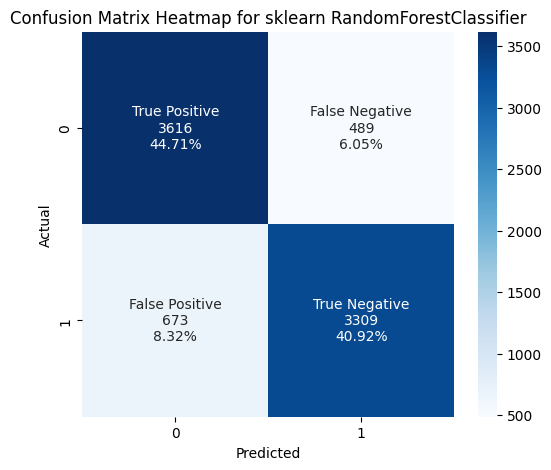

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the estimator
rf_skl_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 250,
                                      n_jobs = -1 #Use all CPU Cores
                                      )

# Fit the training data to model
rf_skl_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_skl_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report #, ConfusionMatrixDisplay

rf_skl_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy for sklearn RandomForestClassifier: {rf_skl_accuracy}")
print("Classification Report for sklearn RandomForestClassifier:")
print(classification_report(y_test, predictions))

# Compute and display confusion matrix
# ConfusionMatrixDisplay.from_predictions(y_test, predictions)

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                     f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                     f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for sklearn RandomForestClassifier')
plt.show()

2. Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for sklearn LogisticRegression: 0.8709039198713986
Classification Report for sklearn LogisticRegression:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      4105
           1       0.85      0.89      0.87      3982

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



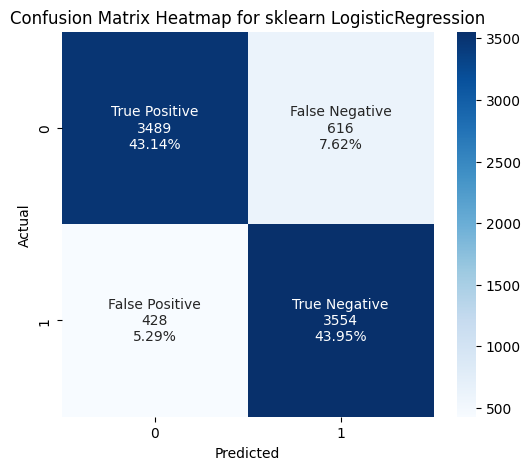

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression
lr_skl_model = LogisticRegression()

# Note: Ensure that 'y_train' is in a compatible shape (1D array)
lr_skl_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr_skl_model.predict(X_test)

# Evaluate the Logistic Regression Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_skl_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy for sklearn LogisticRegression: {lr_skl_accuracy}")
print("Classification Report for sklearn LogisticRegression:")
print(classification_report(y_test, predictions))


# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                     f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                     f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for sklearn LogisticRegression')
plt.show()

3. SVC

Accuracy for sklearn LinearSVC: 0.8763447508346729
Classification Report for sklearn LinearSVC:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4105
           1       0.87      0.88      0.87      3982

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087



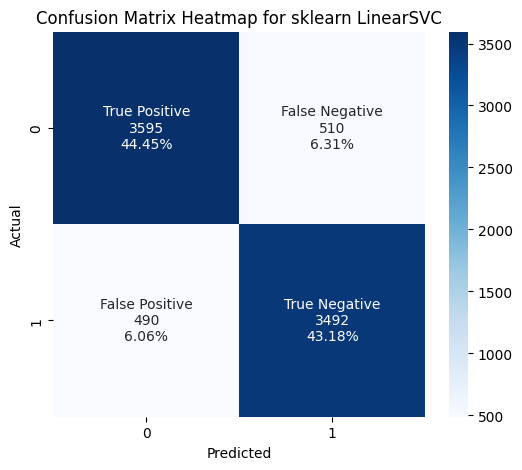

In [ ]:
# from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Instantiate the SVM svm_skl_model
svm_skl_model = LinearSVC(dual=False, max_iter=100000)
# svm_skl_model = SVC(kernel = 'linear', max_iter = 1000)#, cache_size = 300)

# Fit the svm_skl_model to the training data
# Note: Ensure that 'y_train' is in a compatible shape (1D array)
svm_skl_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_skl_model.predict(X_test)

# Evaluate the svm_skl_model
from sklearn.metrics import accuracy_score, classification_report #, ConfusionMatrixDisplay

svm_skl_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy for sklearn LinearSVC: {svm_skl_accuracy}")
print("Classification Report for sklearn LinearSVC:")
print(classification_report(y_test, predictions))

# Compute and display confusion matrix
# ConfusionMatrixDisplay.from_predictions(y_test, predictions)

from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                     f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                     f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for sklearn LinearSVC')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for sklearn SVC: 0.7472486707060715
Classification Report for sklearn SVC:
              precision    recall  f1-score   support

           0       0.67      0.98      0.80      4105
           1       0.96      0.51      0.66      3982

    accuracy                           0.75      8087
   macro avg       0.82      0.74      0.73      8087
weighted avg       0.81      0.75      0.73      8087



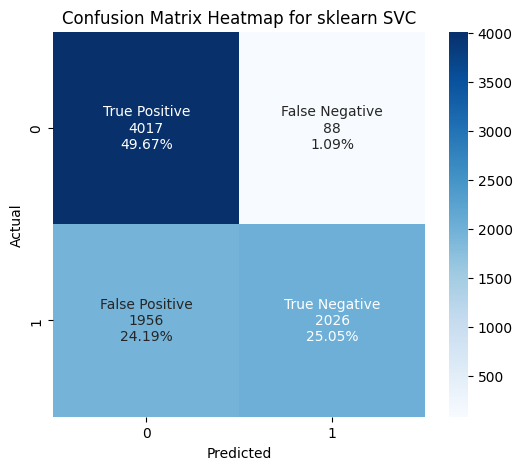

In [ ]:
from sklearn.svm import SVC

Lsvm_skl_model = SVC(kernel="linear", class_weight="balanced", probability=True,max_iter = 5000, cache_size = 300)

Lsvm_skl_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = Lsvm_skl_model.predict(X_test)

# Evaluate the Lsvm_skl_model
from sklearn.metrics import accuracy_score, classification_report
svm_skl_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy for sklearn SVC: {svm_skl_accuracy}")
print("Classification Report for sklearn SVC:")
print(classification_report(y_test, predictions))


from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (raw and normalized)
cm_raw = confusion_matrix(y_test, predictions)
cm_norm = confusion_matrix(y_test, predictions, normalize='all')  # Normalize over total samples

# Get the unique class labels
class_names = sorted(list(set(y_test)))

# Create a formatted annotation matrix (combine raw and percentage values)
labels = np.array([[f"True Positive\n{cm_raw[0,0]}\n{cm_norm[0,0]*100:.2f}%",
                     f"False Negative\n{cm_raw[0,1]}\n{cm_norm[0,1]*100:.2f}%"],
                   [f"False Positive\n{cm_raw[1,0]}\n{cm_norm[1,0]*100:.2f}%",
                     f"True Negative\n{cm_raw[1,1]}\n{cm_norm[1,1]*100:.2f}%"]])

# Create a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_raw, annot=labels, fmt='', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for sklearn SVC')
plt.show()


**Plotting Accuracy for Standard and Implemented Model**

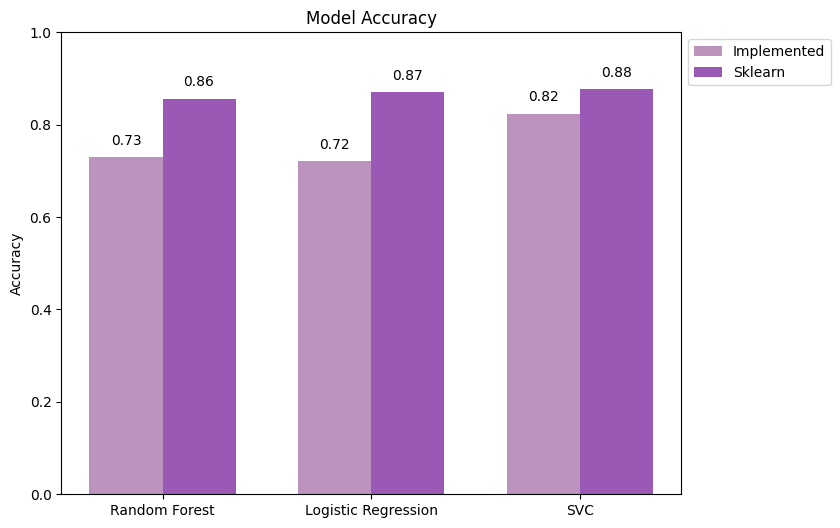

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rf_accuracy = 0.730431556819587
lr_accuracy = 0.7211574131321875 #0.7235068628663287
svm_accuracy = 0.8239149251885742
rf_skl_accuracy = 0.85631260046989 #0.8571781872140473
lr_skl_accuracy = 0.8709039198713986 #0.8722641276122172
svm_skl_accuracy = 0.8763447508346729 #0.8770866823296649

# Create the figure
plt.figure(figsize=(8, 6))

# Define positions for each bar group
x = np.arange(3)  # There are 3 groups
width = 0.35  # Width of each bar

# Plot bars for each model (Implemented vs Sklearn)
bars1 = plt.bar(x - width/2, [rf_accuracy, lr_accuracy, svm_accuracy], width, label='Implemented', color='#bc93bd')
bars2 = plt.bar(x + width/2, [rf_skl_accuracy, lr_skl_accuracy, svm_skl_accuracy], width, label='Sklearn', color='#9b59b6')

# Add title and labels
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(x, ['Random Forest', 'Logistic Regression', 'SVC'])

# Rotate x-axis labels for better visibility
# plt.xticks(rotation=20, ha='right')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Add accuracy values on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


In [60]:
# input_review = input("Enter your review text: ")
# input_rating = float(input("Enter rating: "))

# input_review = input_review.lower()
# # Remove special characters

# input_review = remove_punctuation(input_review)

# # Removing Stopwords like , me, my, myself, we,our, ours, ourselves, you, you're,etc"
# input_review = remove_stopwords(input_review)
# # Removing of Frequent Words

# # from collections import Counter
# # word_count = Counter()

# # for text in input_review:
# #   for word in text.split():
# #     word_count[word] += 1

# # word_count.most_common(10)

# # Removing of rare Word like:{'itm', 'upgrade', 'fingure', 'east', 'pistol', '410ga', 'braces', 'fired', 'eliminated'}

# input_review= remove_special_char(input_review)

# # lemmatization

# # X = [input_review, input_rating]
# # Use the same TfidfVectorizer instance used during training (v)
# X_lemmatized_tfidf = v.transform([input_review])  # Changing list into input_review is in list format
# final_text = hstack([np.array([[input_rating]]), X_lemmatized_tfidf])


# predictions1 = RandomForestClassifier(criterion='entropy')
# predictions = our_model_forest.predict(final_text.toarray())
# def decode(predictions):
#   if predictions ==[1]:
#     return 'Genuine'
#   else:
#     return 'Fake'

# print(f"According to Random Forest classifier review is: {decode(predictions1)}")
# print(f"According to Random Forest review is: {decode(predictions)}")

In [ ]:
import joblib

joblib.dump(v , 'tfidf_vectorizer.pkl')

joblib.dump(lr_skl_model , 'lr_model.pkl')

joblib.dump(rf_skl_model , 'rf_model.pkl')

joblib.dump(svm_skl_model , 'svm_model.pkl')


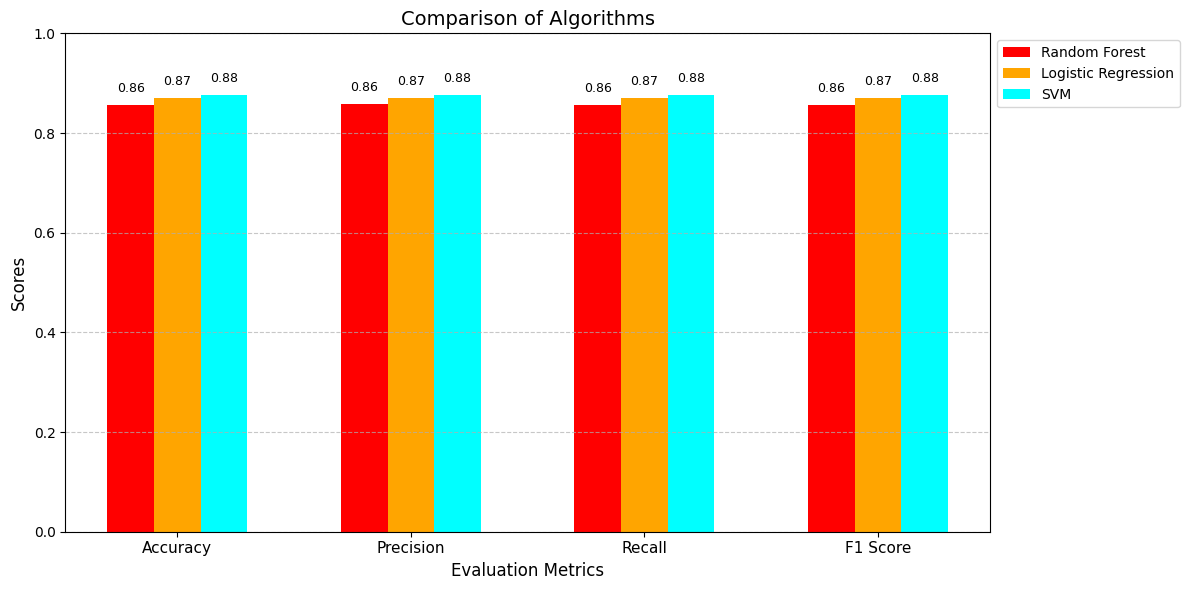

In [61]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the saved models from the pickle files
# we are loading the sklearn model although the name doesnt says so
rf_skl_model = joblib.load('/content/drive/MyDrive/rf_model.pkl')
lr_skl_model = joblib.load('/content/drive/MyDrive/lr_model.pkl')
svm_skl_model = joblib.load('/content/drive/MyDrive/svm_model.pkl')

# Make predictions for each model
rf_predictions = rf_skl_model.predict(X_test)
lr_predictions = lr_skl_model.predict(X_test)
svm_predictions = svm_skl_model.predict(X_test)

# Calculate metrics for each model
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Metrics for Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1 = calculate_metrics(y_test, rf_predictions)

# Metrics for Logistic Regression
lr_accuracy, lr_precision, lr_recall, lr_f1 = calculate_metrics(y_test, lr_predictions)

# Metrics for SVM
svm_accuracy, svm_precision, svm_recall, svm_f1 = calculate_metrics(y_test, svm_predictions)

# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Random Forest', 'Logistic Regression', 'SVM']

# Scores for each model
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

# Set up the plot
x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(12, 6))

# Plot bars for each model
plt.bar(x - width, rf_scores, width, label='Random Forest', color='red')
plt.bar(x, lr_scores, width, label='Logistic Regression', color='orange')
plt.bar(x + width, svm_scores, width, label='SVM', color='cyan')

# Add values on top of the bars
for i, (rf, lr, svm) in enumerate(zip(rf_scores, lr_scores, svm_scores)):
    plt.text(i - width, rf + 0.02, f'{rf:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i, lr + 0.02, f'{lr:.2f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + width, svm + 0.02, f'{svm:.2f}', ha='center', va='bottom', fontsize=9)

# Add labels, title, and legend
plt.xlabel('Evaluation Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Algorithms', fontsize=14)
plt.xticks(x, metrics, fontsize=11)
plt.ylim(0, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()